In [58]:
import h5py

data = h5py.File("/home/john/research/illustris/TNG100-1/files/sublink/tree_extended.0.hdf5")

In [52]:
list(data.keys())

['DescendantID',
 'FirstProgenitorID',
 'FirstSubhaloInFOFGroupID',
 'GroupCM',
 'GroupFirstSub',
 'GroupLen',
 'GroupLenType',
 'GroupMass',
 'GroupMassType',
 'GroupNsubs',
 'GroupPos',
 'GroupVel',
 'Group_M_Crit200',
 'Group_M_Crit500',
 'Group_M_Mean200',
 'Group_M_TopHat200',
 'Group_R_Crit200',
 'Group_R_Crit500',
 'Group_R_Mean200',
 'Group_R_TopHat200',
 'LastProgenitorID',
 'MainLeafProgenitorID',
 'Mass',
 'MassHistory',
 'NextProgenitorID',
 'NextSubhaloInFOFGroupID',
 'NumParticles',
 'RootDescendantID',
 'SnapNum',
 'SubfindID',
 'SubhaloCM',
 'SubhaloGrNr',
 'SubhaloHalfmassRad',
 'SubhaloHalfmassRadType',
 'SubhaloID',
 'SubhaloIDMostbound',
 'SubhaloIDRaw',
 'SubhaloLen',
 'SubhaloLenType',
 'SubhaloMass',
 'SubhaloMassInHalfRad',
 'SubhaloMassInHalfRadType',
 'SubhaloMassInMaxRad',
 'SubhaloMassInMaxRadType',
 'SubhaloMassInRad',
 'SubhaloMassInRadType',
 'SubhaloMassType',
 'SubhaloParent',
 'SubhaloPos',
 'SubhaloSpin',
 'SubhaloVel',
 'SubhaloVelDisp',
 'SubhaloVma

In [10]:
ids = data["SubhaloID"][:]
print(ids.shape)
print(np.unique(ids).shape)

(63497677,)
(63497677,)


In [12]:
descendent = data["DescendantID"][:]
np.unique(descendent, return_counts=True)


(array([      -1,        0,        1, ..., 63497671, 63497672, 63497675]),
 array([818979,   1527,    660, ...,      1,      1,      1]))

In [21]:
root_halos = descendent == -1

root_halo_masses = np.log10(data["SubhaloMass"][root_halos]) + 10

In [16]:
import matplotlib.pyplot as plt

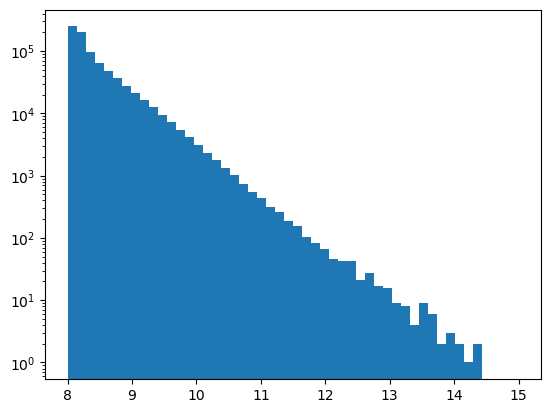

In [22]:
plt.hist(
    root_halo_masses,
    log=True,
    bins=50, range=[8, 15]
);

In [37]:
(root_halo_masses > 10).mean()

0.014371552872540078

In [40]:
root_halo_masses.shape

(818979,)

In [36]:
root_descendent_id = data["RootDescendantID"][:]
print(np.unique(root_descendent_id))

[       0   902888  1001533 ... 63497671 63497674 63497675]


In [28]:
data["SubfindID"][:]

array([ 59551,  43844,  58938, ...,  32810, 545884, 136195], dtype=int32)

In [29]:
data["TreeID"][:]

array([0, 0, 0, ..., 0, 0, 0])

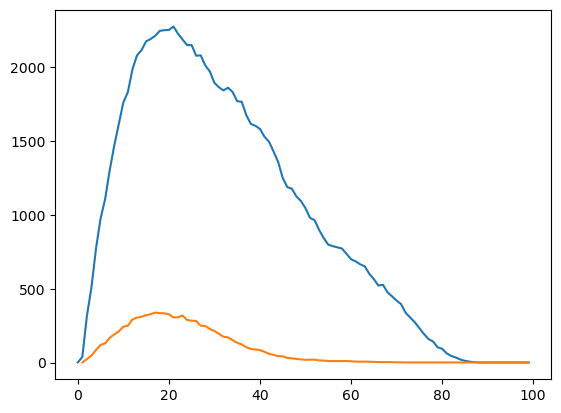

In [45]:
# pick random root and get all progesnitors
RANDOM_ROOT_ID = 902888

# how many subhalos in each snapshot
plt.plot(
    *np.unique(
        data["SnapNum"][root_descendent_id == RANDOM_ROOT_ID],
        return_counts=True
    )
)

# how many massive subhalos (10^9 Msun)
plt.plot(
    *np.unique(
        data["SnapNum"][(root_descendent_id == RANDOM_ROOT_ID) & (data["SubhaloMass"][:] > 0.1)],
        return_counts=True
    )
)